In [77]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_format = 'retina'

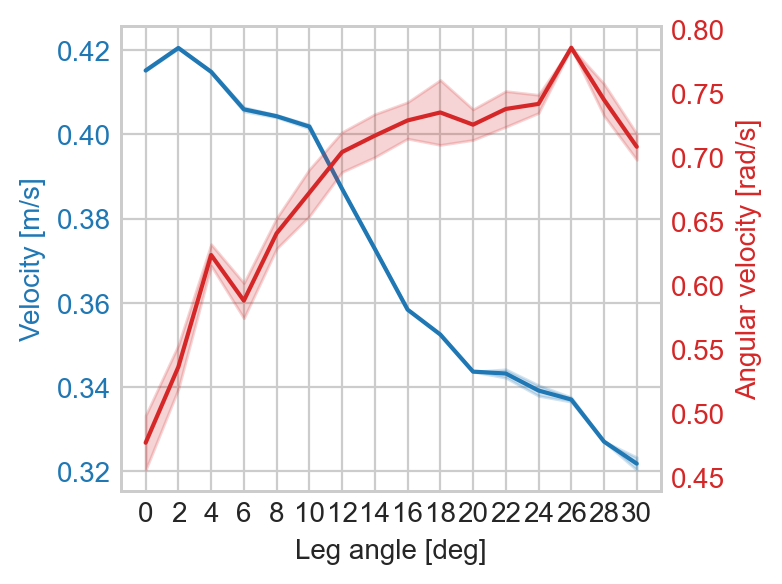

In [109]:
dpi = 100
figsize = (4,3)
df_pace = pd.read_csv('./vel_alternate.csv')
df_rot = pd.read_csv('./vel_rotate.csv')

colors = ["tab:blue","tab:red"]
# print(df.head())
fig, ax0 = plt.subplots(1,1,figsize=figsize,dpi=dpi)
ax1 = ax0.twinx()
axes = [ax0,ax1]

ax1.grid(False)
sns.lineplot(data=df_pace, x="Leg angle [deg]", y="Velocity [m/s]",ax=ax0,ci="sd", color=colors[0])
sns.lineplot(data=df_rot, x="Leg angle [deg]", y="Angular velocity [rad/s]",ax=ax1,ci="sd", color=colors[1])
for k,ax in enumerate(axes): 
    ax.yaxis.label.set_color(colors[k])
    ax.tick_params(axis='y', colors=colors[k])
    

plt.xticks(np.arange(0,31, 2))
plt.tight_layout()
plt.show()